In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
label_size = 22 + 4
tick_size = 20 + 4
title_size = 24 + 4
legend_size = 20

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

/Users/yichen/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yichen/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yichen/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yichen/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

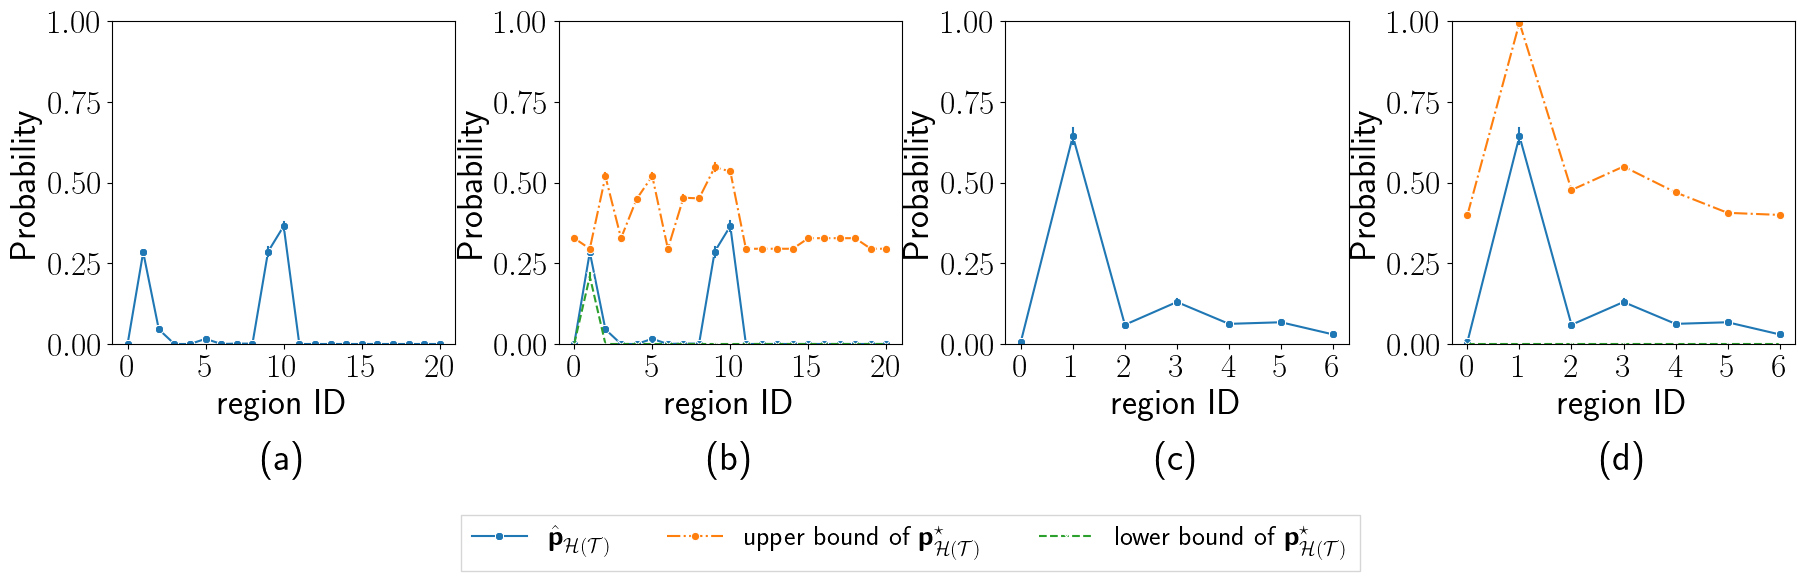

In [2]:
p_hats_dceu = pd.read_parquet("movies_dceu.parquet")
p_hats_movie2 = pd.read_parquet("movies_movie2.parquet")

fig, axs = plt.subplots(1, 4, figsize=(18, 5))
sns.lineplot(data=p_hats_dceu, x="region ID", y="probability", err_style="bars", label=r"$\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}$", marker='8', linestyle='-', ax=axs[0])
sns.lineplot(data=p_hats_dceu, x="region ID", y="probability", err_style="bars", label=r"$\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}$", marker='8', linestyle='-', ax=axs[1])
sns.lineplot(p_hats_dceu, x="region ID", y="p_upper", ax=axs[1], label=r"upper bound of $\textbf{p}^\star_{\mathcal{H}(\mathcal{T})}$", err_style="bars", marker='o', linestyle='-.')
sns.lineplot(p_hats_dceu, x="region ID", y="p_lower", ax=axs[1], label=r"lower bound of $\textbf{p}^\star_{\mathcal{H}(\mathcal{T})}$", err_style="bars", marker='x', linestyle='--')
sns.lineplot(data=p_hats_movie2, x="region ID", y="probability", err_style="bars", label=r"$\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}$", marker='8', linestyle='-', ax=axs[2])
sns.lineplot(data=p_hats_movie2, x="region ID", y="probability", err_style="bars", label=r"$\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}$", marker='8', linestyle='-', ax=axs[3])
sns.lineplot(p_hats_movie2, x="region ID", y="p_upper", ax=axs[3], label=r"upper bound of $\textbf{p}^\star_{\mathcal{H}(\mathcal{T})}$", err_style="bars", marker='o', linestyle='-.')
sns.lineplot(p_hats_movie2, x="region ID", y="p_lower", ax=axs[3], label=r"lower bound of $\textbf{p}^\star_{\mathcal{H}(\mathcal{T})}$", err_style="bars", marker='x', linestyle='--')
axs[0].set_xticks([0, 5, 10, 15, 20])
axs[1].set_xticks([0, 5, 10, 15, 20])
axs[2].set_xticks([0, 1, 2, 3, 4, 5, 6])
axs[3].set_xticks([0, 1, 2, 3, 4, 5, 6])

handles, labels = axs[1].get_legend_handles_labels()

for i, ax in enumerate(axs):
    ax.get_legend().remove()
    ax.set_ylim([0, 1])
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")
    ax.set_ylabel("Probability", fontsize=label_size)
    ax.set_xlabel(r"region ID", fontsize=label_size)
fig.legend(handles, labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=6, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/movies.pdf", dpi=600, format="pdf", bbox_inches="tight")
fig.show()